In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205580 entries, 0 to 205579
Data columns (total 9 columns):
lat          205580 non-null float64
lng          205580 non-null float64
desc         205580 non-null object
zip          180597 non-null float64
title        205580 non-null object
timeStamp    205580 non-null object
twp          205506 non-null object
addr         205580 non-null object
e            205580 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.1+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df['zip'].value_counts().head(5)

19401.0    14234
19464.0    13859
19403.0    10372
19446.0     9910
19406.0     6777
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    17646
ABINGTON        12570
NORRISTOWN      11892
UPPER MERION    10699
CHELTENHAM       9461
Name: twp, dtype: int64

In [9]:
df['title'].nunique()

125

In [10]:
df['reason']=df['title'].apply(lambda title:title.split(':')[0])

In [11]:
df['reason'].value_counts()

EMS        102623
Traffic     72404
Fire        30553
Name: reason, dtype: int64

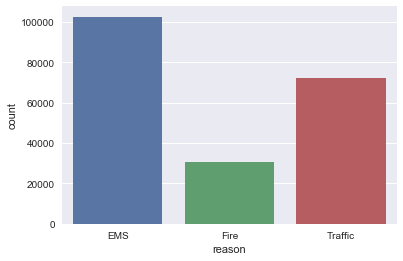

In [12]:
sns.countplot(x='reason',data=df)

In [17]:
type(df['timeStamp'].iloc[0])

str

In [18]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [19]:
type(df['timeStamp'].iloc[0])

pandas.tslib.Timestamp

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


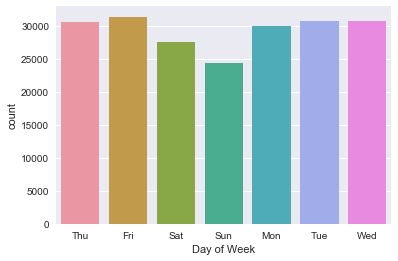

In [24]:
sns.countplot(x='Day of Week',data=df)

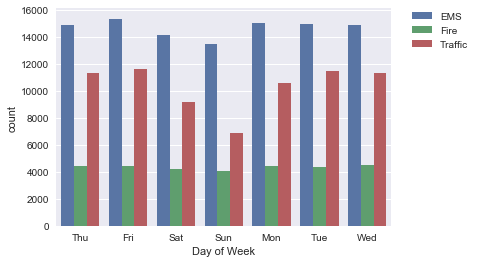

In [26]:
sns.countplot(x='Day of Week',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

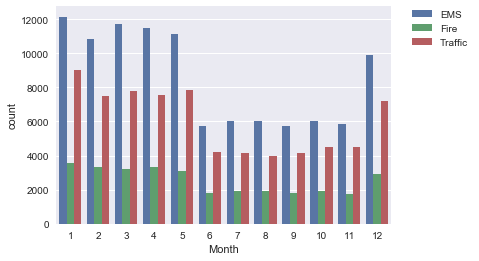

In [27]:
sns.countplot(x='Month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
bymonth=df.groupby('Month').count()

In [29]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,22066,22066,22066,19358,22066,22066,22056,22066,22066,22066,22066,22066


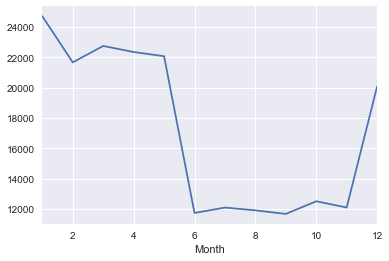

In [30]:
bymonth['lat'].plot()

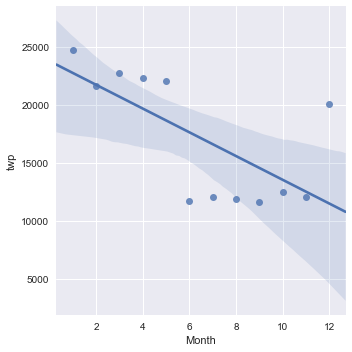

In [31]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [32]:
df['date']=df['timeStamp'].apply(lambda t:t.date())

In [33]:
df.groupby('date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


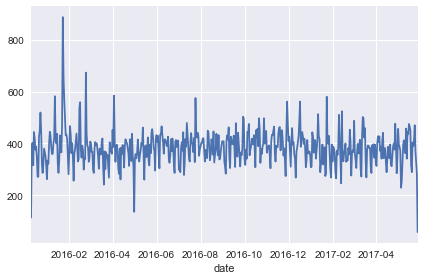

In [35]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

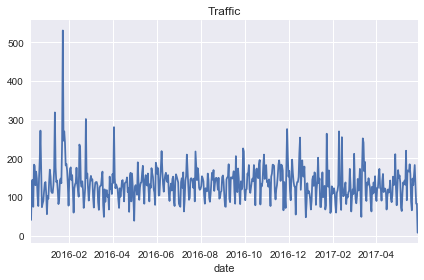

In [39]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

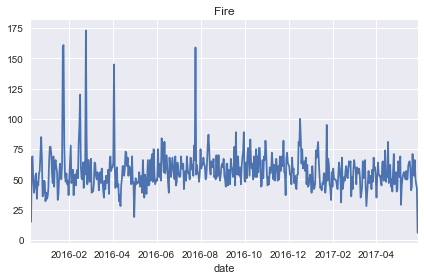

In [40]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

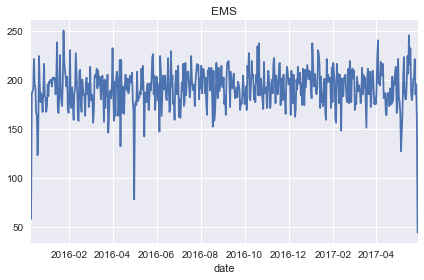

In [41]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [45]:
dayhour=df.groupby(by=['Day of Week','Hour']).count().unstack()['reason']

In [46]:
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,554,493,448,414,379,466,859,1350,1572,1610,...,1889,2070,2142,2146,1647,1544,1364,1184,1105,875
Mon,561,442,429,379,433,541,858,1385,1777,1747,...,1763,1956,1983,2015,1735,1421,1207,950,838,641
Sat,743,622,534,509,490,482,581,778,1018,1344,...,1656,1632,1634,1585,1547,1484,1234,1135,1027,968
Sun,745,660,640,534,458,468,562,738,928,1223,...,1452,1395,1371,1481,1421,1302,1091,979,766,685
Thu,564,413,466,365,357,512,893,1451,1682,1757,...,1838,1998,1959,2162,1741,1438,1277,1122,887,705


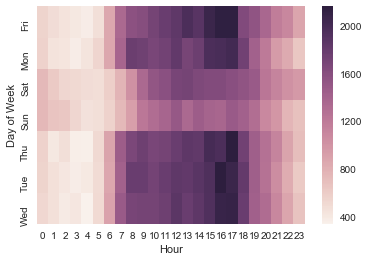

In [47]:
sns.heatmap(dayhour)

C:\Users\zaghlollight\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


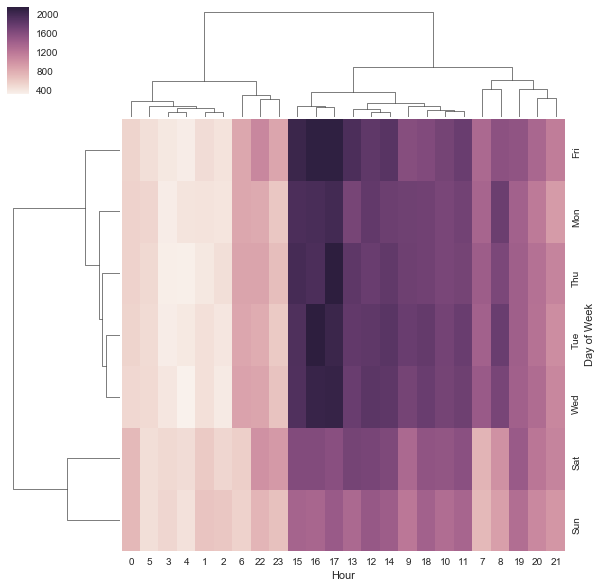

In [48]:
sns.clustermap(dayhour)

In [50]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,3527,3171,3532,3574,3278,1647,2042,1740,2195,1901,1699,3116
Mon,3706,3552,3103,3088,3351,1609,1685,1865,1552,2042,1682,2777
Sat,3527,2871,2539,3490,2764,1376,1691,1423,1406,1935,1516,2975
Sun,3470,2339,2229,3026,2580,1329,1667,1360,1235,1757,1281,2177
Thu,3182,3189,3909,3097,3289,2055,1642,1579,2165,1625,1630,3264


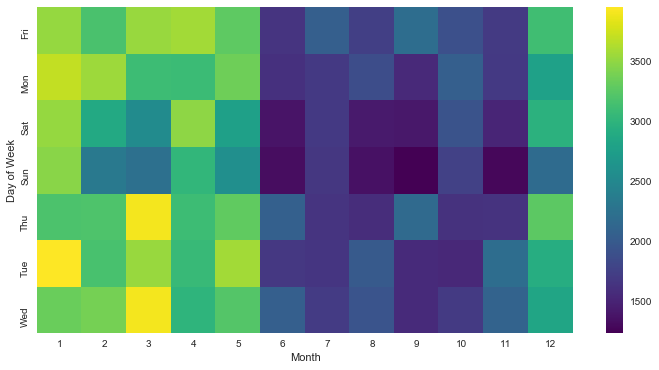

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')